## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata,study_results, on='Mouse ID',how='left')

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(pd.unique(mouse_df['Mouse ID']))

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_df[mouse_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicated_mouse_df=mouse_df.loc[mouse_df['Mouse ID']== "g989"]
duplicated_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df=mouse_df.loc[mouse_df['Mouse ID']!= "g989"]
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(clean_mouse_df['Mouse ID']))

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_stats_df = clean_mouse_df.groupby('Drug Regimen')
means = drug_stats_df['Tumor Volume (mm3)'].mean()
medians = drug_stats_df['Tumor Volume (mm3)'].median()
var = drug_stats_df['Tumor Volume (mm3)'].var()
stds = drug_stats_df['Tumor Volume (mm3)'].std()
sems = drug_stats_df['Tumor Volume (mm3)'].sem()

sum_stats = pd.DataFrame({"Mean Tumor Volume": means,
                          "Media Tumor Volume": medians,
                          "Variance in Tumor Volume": var,
                          "Standard Deviation in Tumor Volume": stds,
                          "SEM Tumor Volume": sems,})
sum_stats.head()

,Mean Tumor Volume,Media Tumor Volume,Variance in Tumor Volume,Standard Deviation in Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_mouse_df['Mouse ID'].count()

1880

## Bar and Pie Charts

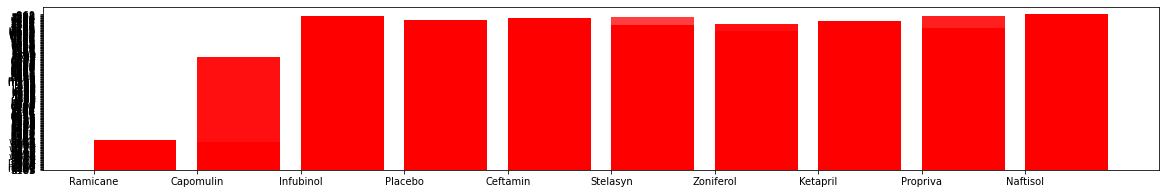

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
regimen_chart = clean_mouse_df[['Drug Regimen','Mouse ID']]
plt.figure(figsize=(20,3))
plt.bar(regimen_chart['Drug Regimen'], regimen_chart["Mouse ID"], color='r', alpha=0.5, align="edge")
plt.show()

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.


ValueError: could not convert string to float: 'Ramicane'

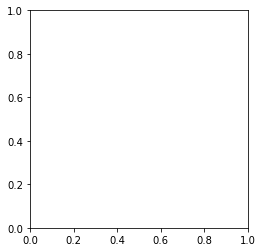

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
my_labels = 'Ramicane','Capomulin','Infubinol','Placebo','Ceftamin','Stelasyn','Zoniferol','Ketapril','Propriva','Naftisol'
my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0, 0.1, 0)
plt.pie(regimen_chart, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('My Tasks')
plt.axis('equal')
plt.show()


In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=None, data=None)>

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

tp_df= clean_mouse_df.groupby(['Mouse ID'])['Timepoint'].max()

tp_df= tp_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = tp_df.merge(clean_mouse_df, on=['Mouse ID','Timepoint'])

merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [21]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_df= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_vol= merged_df.loc[merged_df['Drug Regimen'] == treatment]
    
    # add subset 
    
    tumor_df.append(drug_vol)
   
        # Determine outliers using upper and lower bounds
    quartiles = drug_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of occupancy is: {lowerq}")
    print(f"The upper quartile of occupancy is: {upperq}")
    print(f"The interquartile range of occupancy is: {iqr}")
    print(f"The the median of occupancy is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

KeyError: 0.25

ValueError: X must have 2 or fewer dimensions

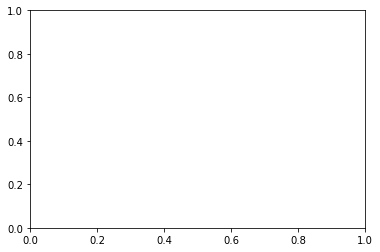

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_df, labels=treatments)
plt.show()

## Line and Scatter Plots

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
merged_df.loc[merged_df['a203'] == treatment]

KeyError: 'a203'

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(merged_df('Tumor Volume (mm3)'), merged_df('Weight (g)'), marker="o", facecolors="red", edgecolors="black")

TypeError: 'DataFrame' object is not callable

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_corr = merged_df.corr()
mouse_corr.unstack().sort_values()

Weight (g)          Timepoint            -0.748053
Timepoint           Weight (g)           -0.748053
Tumor Volume (mm3)  Age_months           -0.743141
Age_months          Tumor Volume (mm3)   -0.743141
Metastatic Sites    Age_months           -0.523748
Age_months          Metastatic Sites     -0.523748
                    Weight (g)           -0.363557
Weight (g)          Age_months           -0.363557
Metastatic Sites    Weight (g)           -0.342741
Weight (g)          Metastatic Sites     -0.342741
Age_months          Timepoint            -0.302775
Timepoint           Age_months           -0.302775
Tumor Volume (mm3)  Timepoint            -0.077804
Timepoint           Tumor Volume (mm3)   -0.077804
Tumor Volume (mm3)  Metastatic Sites      0.254298
Metastatic Sites    Tumor Volume (mm3)    0.254298
Weight (g)          Tumor Volume (mm3)    0.696979
Tumor Volume (mm3)  Weight (g)            0.696979
Metastatic Sites    Timepoint             0.752176
Timepoint           Metastatic 